5.[RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# posts dataset
fields=['profile_id','location_id','post_type','numbr_likes','number_comments']
dpost=pd.read_csv('~/instagram_posts.csv',sep='\t',usecols=fields)

In [4]:
#profiles dataset
dp = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_profiles.zip', delimiter='\t')

In [5]:
#locations dataset
dloc = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_locations.zip', delimiter='\t')


1) Plot the top 10 most popular users in terms of followers and their number of posts.


In [23]:
followers=dp['followers']
followers.nlargest(10)

2880218    285457645.0
2582507     65269440.0
3820939     35339708.0
701965      30689316.0
2414951     30246783.0
2785241     29542143.0
333193      29176804.0
3934581     29042823.0
1311970     26476004.0
1703764     26252169.0
Name: followers, dtype: float64

In [7]:
#top10 profiles by followers
top10=dp[dp.followers >= 26252169.0]
top10.sort_values(['followers'],ascending=False)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


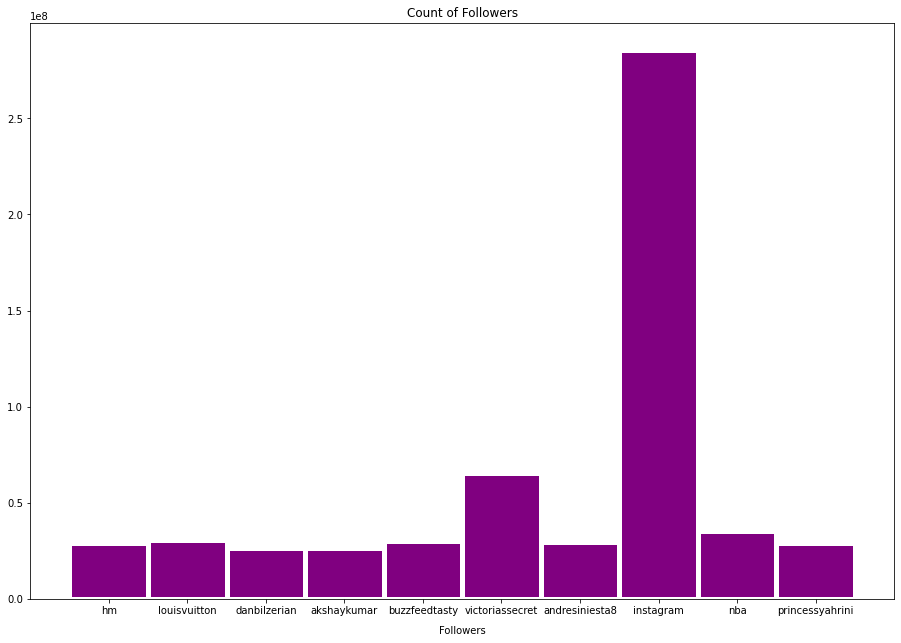

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
profiles = list(top10['profile_name'])
nfollows = list(top10['followers'])
ax.bar(profiles,nfollows,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('Followers',labelpad=10)
plt.ylabel('',labelpad=10)
plt.title('Count of Followers')
plt.show()

2) Who is the most influential user?


In [24]:
#most influential user
dp[dp.followers == 285457645.0] 

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False


The most influential user is Instagram


3) Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [9]:
#a dataframe containing all the posts by the top 10 most influential users
y=pd.DataFrame(columns=['profile_id'])
for i in [23410080.0,
 187619120.0,
 50417061.0,
 907025384.0,
 2125506698.0,
 3416684.0,
 496865116.0,
 25025320.0,
 20824486.0,
 24239929.0]:
    x=dpost[dpost['profile_id']==int(i)]
    y=pd.merge(y,x,how='outer')
print(y)

      profile_id   location_id  post_type  numbr_likes  number_comments
0     23410080.0  3.846191e+08          1     116059.0            642.0
1     23410080.0  2.293029e+08          1      46368.0             88.0
2    187619120.0  5.590714e+06          1     186857.0            867.0
3     50417061.0  2.222444e+08          1     266200.0           3290.0
4     50417061.0  2.368281e+08          1     268732.0           6402.0
..           ...           ...        ...          ...              ...
136   24239929.0  2.130118e+08          1      55010.0              0.0
137   24239929.0  2.130118e+08          1     114315.0              0.0
138   24239929.0  2.130118e+08          1      78974.0              0.0
139   24239929.0  1.906910e+15          1     132116.0              0.0
140   24239929.0  1.906910e+15          1      66185.0              0.0

[141 rows x 5 columns]


In [42]:
loc_id= y['location_id']
loc_id.apply(lambda x: format(x, 'f'))

0             384619115.000000
1             229302869.000000
2               5590714.000000
3             222244450.000000
4             236828105.000000
                ...           
136           213011753.000000
137           213011753.000000
138           213011753.000000
139    1906910439594849.000000
140    1906910439594849.000000
Name: location_id, Length: 141, dtype: object

In [47]:
cc=[i for i in loc_id]
ac=pd.DataFrame(columns=['sid','name','city'])


#dataframe containing all the locations tagged by the top10 users

for i in range(len(dloc)):
    if dloc['id'][i] in cc:
        x=dloc[dloc.id == dloc['id'][i]]
        ac=pd.merge(ac,x,how='outer')

In [48]:
acg=ac.groupby(['city'])['city'].count()

In [49]:
acg[:50]


city
Adelaide, South Australia             1
Akron, Ohio                           1
Amphoe Pak Chong                      1
Amsterdam, Netherlands                3
Bad Urach                             1
Barcelona, Spain                      1
Bel Air, Los Angeles                  1
Blangpidi, Aceh, Indonesia            1
Boulder City, Nevada                  1
Chawton                               1
Chicago, Illinois                     1
Crystal Falls, Michigan               1
Cusco, Peru                           1
Dallas, Texas                         1
Detroit, Michigan                     1
Eastwick, Pennsylvania                1
Forres                                1
Hackney, Hackney, United Kingdom      1
Hadleigh, Essex                       1
Herne Bay, Kent                       1
Hong Kong                             1
Houston, Texas                        3
Jakarta, Indonesia                    1
Kirkkonummi                           1
Kobe-shi, Hyogo, Japan             

In [50]:
acg[50:]

city
Santa Monica, California      1
Shanghai, China               2
Singapore                     4
Springfield, Massachusetts    1
Stony Plain, Alberta          1
Sydney, Australia             1
Toronto, Ontario              1
Tulum, Quintana Roo           1
Vail, Colorado                1
Vaitape, French Polynesia     1
Valencia                      1
Valley Park, Missouri         1
Xiandu, Zhejiang, China       1
Name: city, dtype: int64

In [51]:
freq=list(acg)
dd=[]
for i in freq:
    if i != 1:
        dd.append(i)
city=['Amsterdam, Netherlands','Houston, Texas','Las Vegas, Nevada','London, United Kingdom','Los Angeles, California ','New York, New York','Shanghai, China','Singapore']

In the following plot we can observe the number of times each city has been tagged by one of the top 10 most influential users of Instagram;
Only the cities visited more than one time are plotted.

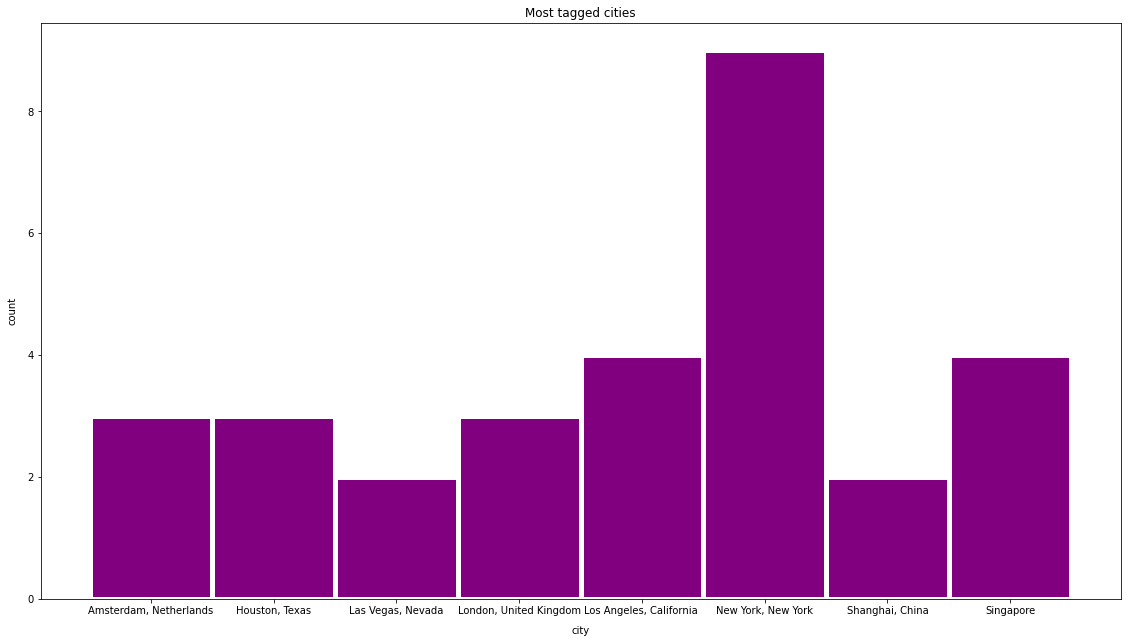

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2])
ax.bar(city,dd,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('city',labelpad=10)
plt.ylabel('count',labelpad=10)
plt.title('Most tagged cities')
plt.show()

.




4) How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [53]:
#1)How many pictures-only posts have they published?
#2)How many reels? (only videos) and 
#3)how many with both contents? Provide the number as percentages and interpret those figures.
y.groupby(['profile_id','post_type'])["numbr_likes"].count()
#1) 
ptype=y.groupby(['post_type'])["numbr_likes"].count()
ptype


post_type
1    128
2     13
Name: numbr_likes, dtype: int64

After applying the 'groupby' function to the dataframe containing the most influential users, we notice that we have 141 posts made by them in our posts dataset; 
Of these posts, 128 are pictures-only posts, 13 are reel and 0 are with both content.

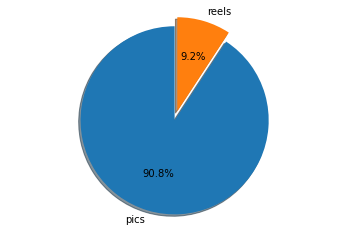

In [54]:
#3) percentages of pictures-only posts, reels and both
pic=128/(128+13)
reel=13/(128+13)
pic*100,reel*100

labels = 'pics', 'reels'
sizes = [128,13]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

After observing the plot, we can say that pictures-only posts are the vast majority of the total, being 90.8%, and reels appear approximately once every 10 posts(9.2%)

.




5) How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [57]:
#How many "likes" and comments did posts with only pictures receive?
y.groupby(['post_type'])["numbr_likes"].mean()
#How about videos and mixed posts? 
#Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

post_type
1    541294.015625
2    266524.153846
Name: numbr_likes, dtype: float64

In [56]:
y.groupby(['post_type'])["number_comments"].mean()

post_type
1    3882.914062
2    2019.846154
Name: number_comments, dtype: float64

We start by analizing the posts made by the top 10 most influencial users.
When they post a picture, they get on average 541294 likes and 3883 comments, while when they post reels they get on average 266524.1 likes and 2019.8 comments.
Since we don't have datas regarding their mixed posts, we can't say what is the average number of likes and comments for those types of posts.

In [59]:
dpost.groupby(['post_type'])["numbr_likes"].mean()

post_type
1    280.659566
2    390.781299
3    194.758812
Name: numbr_likes, dtype: float64

In [58]:
dpost.groupby(['post_type'])["number_comments"].mean()

post_type
1     7.498260
2    11.179689
3     6.701434
Name: number_comments, dtype: float64

If we analize all the users, with any number of followers, we obviously get smaller outputs for average likes and comments. 
The average number of likes for a picture-only post, considering all the posts we can analize, is 280.6, while for comments is 390.8.
For reels, the average likes and comments are 390.8 and 11.2.
We can now dispose also of the mixed posts datas, and we observe that they receive an average of 194.7 likes and 6.7 comments.
The biggest difference between the most influential users and all the users is that on average they receive more likes and comments on average on only_pictures post, while regular users receive more likes and comments on average on the reels.

.





7.[RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

In [6]:
folid=dp[['followers','profile_id']]
folid.dropna(subset=['followers'], inplace=True)

,followers,profile_id
0,146.0,4.721050e+09
1,1145.0,5.905830e+08
2,324.0,1.074147e+09
3,NaN,1.472039e+09
4,NaN,3.531421e+09
...,...,...
4509581,481.0,1.418322e+09
4509582,NaN,1.340704e+07
4509583,NaN,6.007354e+09
4509584,153.0,2.338990e+07


In [8]:
dpost7=dpost[['profile_id','numbr_likes']]
dpost7.dropna(subset=['numbr_likes'], inplace=True)

,profile_id,numbr_likes
0,2.237948e+09,80.0
1,5.579335e+09,25.0
2,3.134296e+08,9.0
3,1.837593e+09,4.0
4,1.131527e+09,8.0
...,...,...
42710192,5.556457e+09,74.0
42710193,3.371865e+08,49.0
42710194,3.289886e+09,18.0
42710195,8.536366e+09,27.0


In [24]:
#memoryError
#dpost7.merge(folid,how='left',on='profile_id')

In [9]:
chunk_list = []
for i in range(0, len(dpost7), 5000000):
    chunk = dpost7[i:i+5000000]
    chunk_list.append(chunk)

In [ ]:
#kernel dies
g=0
l_data=0
for c in range(len(chunk_list)):
    a=chunk_list[c].merge(folid,how='left',on='profile_id')
    a.dropna(subset=['numbr_likes', 'followers'], inplace=True)
    a.reset_index(drop=True,inplace=True)
    l_data=l_data+int(len(a))
    for i in range(len(a)):
        if a['numbr_likes'][i]>(a['followers'][i]):
            g+=1
g

In [29]:
#kernel works the first time, then dies
g=0
a=chunk_list[0].merge(folid,how='left',on='profile_id')
a.dropna(subset=['numbr_likes', 'followers'], inplace=True)
a.reset_index(drop=True,inplace=True)
for i in range(len(a)):
    if a['numbr_likes'][i]>(a['followers'][i]/5):
        g+=1

len(a),g,g/len(a)

(1115677, 313892, 0.28134666216118104)

In [ ]:
#second time, when it dies
g=0
a=chunk_list[1].merge(folid,how='left',on='profile_id')
a.dropna(subset=['numbr_likes', 'followers'], inplace=True)
a.reset_index(drop=True,inplace=True)
for i in range(len(a)):
    if a['numbr_likes'][i]>(a['followers'][i]/5):
        g+=1

g/len(a),g,len(a)

In [80]:
a=chunk_list[0].merge(folid,how='left',on='profile_id')

In [81]:
len(a)

5694979

In [82]:
a.dropna(subset=['numbr_likes', 'followers'], inplace=True)

In [83]:
len(a)

1115677

In [105]:
a[['numbr_likes','followers']]

,numbr_likes,followers
0,80.0,1204.0
10,114.0,3906.0
26,46.0,164.0
29,66.0,1640.0
61,11.0,315.0
...,...,...
5694838,163.0,372.0
5694925,216.0,18245.0
5694934,1064.0,11493.0
5694947,16.0,1298.0


In [111]:
a.reset_index(drop=True,inplace=True)

In [119]:
g=0
for i in range(len(a)):
    if a['numbr_likes'][i]>(a['followers'][i]/5):
        g+=1
g
    

313892

In [120]:
g/len(a)

0.28134666216118104

Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [16]:
pl=dpost.groupby(['profile_id','location_id'])['location_id'].count()

In [17]:
pl

profile_id    location_id 
3.000000e+00  1.000000e+01    1
              5.400000e+01    1
              8.030000e+02    1
              1.526200e+04    1
              2.705200e+04    1
                             ..
9.001013e+13  6.631216e+14    1
              2.075964e+14    1
              1.855425e+14    2
              2.418404e+08    1
9.001014e+13  1.077310e+06    1
Name: location_id, Length: 21096135, dtype: int64

In [21]:
pl.value_counts().head(70)

1     18134031
2      1662813
3       538694
4       237039
5       136753
        ...   
76           4
64           4
69           3
84           3
74           3
Name: location_id, Length: 70, dtype: int64

Probability that a user visits once a location

In [22]:
#users visit once a location
18134031/21096135

0.8595902045564271

Probability that a user returns to a site after having posted it in the past

In [23]:
1-18134031/21096135

0.1404097954435729